# User Analytics in the Telecommunication Industry

In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
teledf=pd.read_excel("../data/Week1_challenge_data_source.xlsx")

In [4]:
teledf.shape

(150001, 55)

In [5]:
teledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 149010 non-null  float64       
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [7]:
teledf.isnull().sum().sort_values(ascending=False)

Nb of sec with 37500B < Vol UL              130254
Nb of sec with 6250B < Vol UL < 37500B      111843
Nb of sec with 125000B < Vol DL              97538
TCP UL Retrans. Vol (Bytes)                  96649
Nb of sec with 31250B < Vol DL < 125000B     93586
Nb of sec with 1250B < Vol UL < 6250B        92894
Nb of sec with 6250B < Vol DL < 31250B       88317
TCP DL Retrans. Vol (Bytes)                  88146
HTTP UL (Bytes)                              81810
HTTP DL (Bytes)                              81474
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Last Location Name                            1153
MSISDN/Number                                 1066
Bearer Id                                      991
Nb of sec with Vol UL < 1250B                  793
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)           

In [8]:
# dropable_columns=[
# "Nb of sec with 37500B < Vol UL",
# "Nb of sec with 6250B < Vol UL < 37500B",
# "Nb of sec with 125000B < Vol DL" ,
# "TCP UL Retrans. Vol (Bytes)"
# "Nb of sec with 31250B < Vol DL < 125000B",
# "Nb of sec with 1250B < Vol UL < 6250B",
# "Nb of sec with 6250B < Vol DL < 31250B",
# "TCP DL Retrans. Vol (Bytes)",
# "HTTP UL (Bytes)",
# "HTTP DL (Bytes)"
# ]
# for el in dropable_columns:
#     teledf.drop([el], axis=1, inplace=True)


Data Exploration

In [9]:
#number of handset types in the dataframe
teledf["Handset Type"].replace({"":None}, inplace=True)
handsetdf=teledf["Handset Type"].value_counts().nlargest(10)
handsetdf

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

<AxesSubplot:>

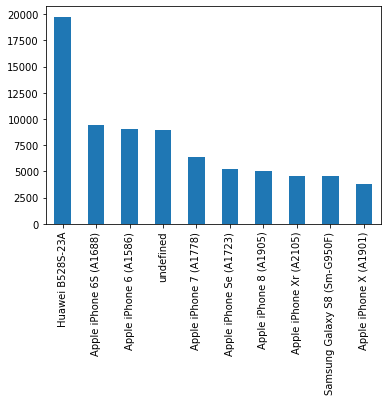

In [10]:

#number of handset types in the dataframe 
handsetdf.plot(kind="bar")


In [11]:
teledf["Handset Manufacturer"].value_counts().nlargest(10)

Apple                                   59565
Samsung                                 40839
Huawei                                  34423
undefined                                8987
Sony Mobile Communications Ab             980
Wiko Global Sasu                          747
Xiaomi Communications Co Ltd              397
Oneplus Technology (Shenzhen) Co Ltd      342
Asustek                                   285
Lenovo                                    254
Name: Handset Manufacturer, dtype: int64

In [12]:
teledf["Handset Manufacturer"].replace({"undefined":"NaN"}, inplace=True)
teledf["Handset Manufacturer"].dropna(inplace=True)
clean_headset_count=teledf["Handset Manufacturer"].value_counts().nlargest(10)

<AxesSubplot:>

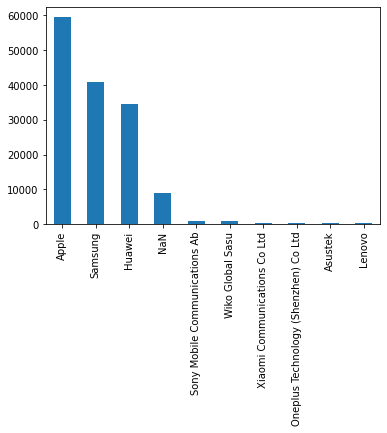

In [13]:
clean_headset_count.plot(kind="bar")

In [14]:
# teledf.loc[teledf["Handset Manufacturer"] == some_value]
clean_headset_count = teledf["Handset Manufacturer"].value_counts().nlargest(3)
clean_headset_count


Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [15]:


appledf=teledf.loc[teledf["Handset Manufacturer"] == "Apple"]
samsungdf=teledf.loc[teledf["Handset Manufacturer"] == "Samsung"]
huaweidf = teledf.loc[teledf["Handset Manufacturer"] == "Huawei"]



In [16]:
apple_handsets=appledf["Handset Type"].value_counts().nlargest(5)
samsung_handsets=samsungdf["Handset Type"].value_counts().nlargest(5)
huawei_handsets=huaweidf["Handset Type"].value_counts().nlargest(5)
print(apple_handsets)
print(samsung_handsets)
print(huawei_handsets)

Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64


<AxesSubplot:>

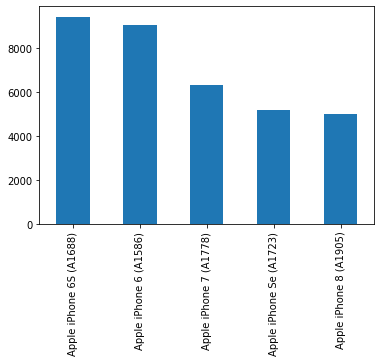

In [17]:
apple_handsets.plot(kind="bar")

<AxesSubplot:>

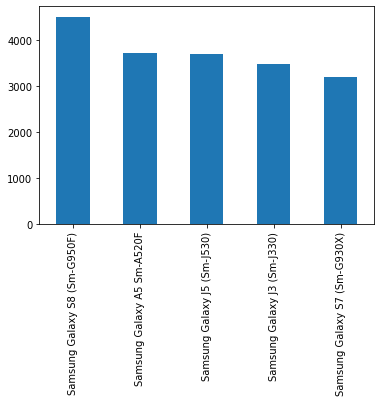

In [18]:
samsung_handsets.plot(kind="bar")

<AxesSubplot:>

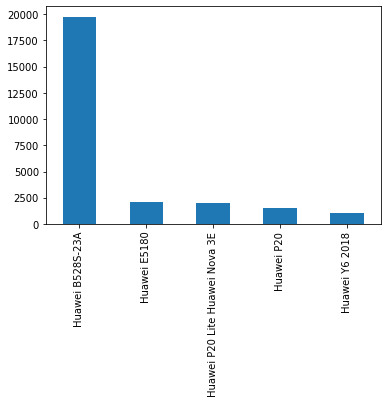

In [19]:
huawei_handsets.plot(kind="bar")



The most used phone on customer hands are the following:



-Huawei B528S-23A (Huawei)
-Apple iPhone 6S (Apple)
-Apple iPhone 6 (Apple)


In [20]:
teledf["Bearer Id"].fillna("", inplace=True)
teledf["MSISDN/Number"].fillna("Miss", inplace=True)

teledf["MSISDN/Number"].dropna(inplace=True)
teledf["Bearer Id"].dropna(inplace=True)

teledf["Dur. (ms)"].fillna(0, inplace=True)
teledf["Total UL (Bytes)"].fillna(0, inplace=True)
teledf["Total DL (Bytes)"].fillna(0, inplace=True)

clean_df=teledf[
   [
    "MSISDN/Number",
    "Bearer Id",
    "Dur. (ms)",
    "Total UL (Bytes)",
    "Total DL (Bytes)",
    "HTTP DL (Bytes)",
    "HTTP UL (Bytes)",
    "Youtube DL (Bytes)",
    "Youtube UL (Bytes)",
    "Netflix DL (Bytes)",
    "Netflix UL (Bytes)",
    "Gaming DL (Bytes)",
    "Gaming UL (Bytes)",
    "Google DL (Bytes)",
    "Google UL (Bytes)",
    "Email DL (Bytes)",
    "Email UL (Bytes)",
    "Social Media DL (Bytes)",
    "Social Media UL (Bytes)",
    "Other DL (Bytes)",
    "Other UL (Bytes)",
]
]
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MSISDN/Number            150001 non-null  object 
 1   Bearer Id                150001 non-null  object 
 2   Dur. (ms)                150001 non-null  float64
 3   Total UL (Bytes)         150001 non-null  float64
 4   Total DL (Bytes)         150001 non-null  float64
 5   HTTP DL (Bytes)          68527 non-null   float64
 6   HTTP UL (Bytes)          68191 non-null   float64
 7   Youtube DL (Bytes)       150001 non-null  float64
 8   Youtube UL (Bytes)       150001 non-null  float64
 9   Netflix DL (Bytes)       150001 non-null  float64
 10  Netflix UL (Bytes)       150001 non-null  float64
 11  Gaming DL (Bytes)        150001 non-null  float64
 12  Gaming UL (Bytes)        150001 non-null  float64
 13  Google DL (Bytes)        150001 non-null  float64
 14  Goog

In [21]:
teledf["HTTP DL (Bytes)"].fillna(teledf["HTTP DL (Bytes)"].mean(), inplace=True)
teledf["HTTP UL (Bytes)"].fillna(teledf["HTTP DL (Bytes)"].mean(), inplace=True)
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MSISDN/Number            150001 non-null  object 
 1   Bearer Id                150001 non-null  object 
 2   Dur. (ms)                150001 non-null  float64
 3   Total UL (Bytes)         150001 non-null  float64
 4   Total DL (Bytes)         150001 non-null  float64
 5   HTTP DL (Bytes)          68527 non-null   float64
 6   HTTP UL (Bytes)          68191 non-null   float64
 7   Youtube DL (Bytes)       150001 non-null  float64
 8   Youtube UL (Bytes)       150001 non-null  float64
 9   Netflix DL (Bytes)       150001 non-null  float64
 10  Netflix UL (Bytes)       150001 non-null  float64
 11  Gaming DL (Bytes)        150001 non-null  float64
 12  Gaming UL (Bytes)        150001 non-null  float64
 13  Google DL (Bytes)        150001 non-null  float64
 14  Goog

In [22]:
clean_df.nunique()

MSISDN/Number              106857
Bearer Id                  134709
Dur. (ms)                   89526
Total UL (Bytes)           149729
Total DL (Bytes)           149988
HTTP DL (Bytes)             63527
HTTP UL (Bytes)             59942
Youtube DL (Bytes)         149547
Youtube UL (Bytes)         149477
Netflix DL (Bytes)         149518
Netflix UL (Bytes)         149490
Gaming DL (Bytes)          149983
Gaming UL (Bytes)          149316
Google DL (Bytes)          149024
Google UL (Bytes)          147267
Email DL (Bytes)           146916
Email UL (Bytes)           138699
Social Media DL (Bytes)    146856
Social Media UL (Bytes)     59078
Other DL (Bytes)           149986
Other UL (Bytes)           149284
dtype: int64

In [23]:



clean_df["Total UL (Bytes)"]=clean_df["Total UL (Bytes)"]/1000000
clean_df["Total DL (Bytes)"]=clean_df["Total DL (Bytes)"]/1000000
clean_df["HTTP UL (Bytes)"] = clean_df["HTTP UL (Bytes)"] / 1000000
clean_df["HTTP DL (Bytes)"] = clean_df["HTTP DL (Bytes)"] / 1000000
clean_df["Youtube DL (Bytes)"]=clean_df["Youtube DL (Bytes)"]/1000000
clean_df["Youtube UL (Bytes)"]=clean_df["Youtube UL (Bytes)"]/1000000
clean_df["Netflix DL (Bytes)"]=clean_df["Netflix DL (Bytes)"]/1000000
clean_df["Netflix UL (Bytes)"]=clean_df["Netflix UL (Bytes)"]/1000000
clean_df["Gaming DL (Bytes)"]=clean_df["Gaming DL (Bytes)"]/1000000
clean_df["Gaming UL (Bytes)"]=clean_df["Gaming UL (Bytes)"]/1000000
clean_df["Google DL (Bytes)"]=clean_df["Google DL (Bytes)"]/1000000
clean_df["Google UL (Bytes)"]=clean_df["Google UL (Bytes)"]/1000000
clean_df["Email DL (Bytes)"]=clean_df["Email DL (Bytes)"]/1000000
clean_df["Email UL (Bytes)"]=clean_df["Email UL (Bytes)"]/1000000
clean_df["Social Media DL (Bytes)"]=clean_df["Social Media DL (Bytes)"]/1000000
clean_df["Social Media UL (Bytes)"]=clean_df["Social Media UL (Bytes)"]/1000000
clean_df["Other DL (Bytes)"]=clean_df["Other DL (Bytes)"]/1000000
clean_df["Other UL (Bytes)"]=clean_df["Other UL (Bytes)"]/1000000
clean_df.rename(columns={
                        "Total UL (Bytes)": "Total UL (MB)", 
                        "Total DL (Bytes)":"Total DL (MB)",
                        "HTTP UL (Bytes)": "HTTP UL (MB)", 
                        "HTTP DL (Bytes)":"HTTP DL (MB)",
                        "Youtube DL (Bytes)":"Youtube DL (MB)",
                        "Youtube UL (Bytes)":"Youtube UL (MB)",
                        "Netflix DL (Bytes)":"Netflix DL (MB)",
                        "Netflix UL (Bytes)":"Netflix UL (MB)",
                        "Gaming DL (Bytes)":"Gaming DL (MB)",
                        "Gaming UL (Bytes)":"Gaming UL (MB)",
                        "Google DL (Bytes)":"Google DL (MB)",
                        "Google UL (Bytes)":"Google UL (MB)",
                        "Email DL (Bytes)":"Email DL (MB)",
                        "Email UL (Bytes)":"Email UL (MB)",
                        "Social Media DL (Bytes)":"Social Media DL (MB)",
                        "Social Media UL (Bytes)":"Social Media UL (MB)",
                        "Other DL (Bytes)":"Other DL (MB)",
                        "Other UL (Bytes)":"Other UL (MB)"
                         },inplace=True)



C:\Users\hp\AppData\Local\Temp\ipykernel_7848\1811658082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["Total UL (Bytes)"]=clean_df["Total UL (Bytes)"]/1000000
C:\Users\hp\AppData\Local\Temp\ipykernel_7848\1811658082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["Total DL (Bytes)"]=clean_df["Total DL (Bytes)"]/1000000
C:\Users\hp\AppData\Local\Temp\ipykernel_7848\1811658082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [24]:
def returnSum(item):
    return clean_df.groupby(["MSISDN/Number"])[item].agg(
    [(item, "sum")]
).reset_index()

def returnCount(item):
    return clean_df.groupby(["MSISDN/Number"])[item].agg([(item, "count")]).reset_index()

arr=["Total UL (MB)",
    "Total DL (MB)",
    "HTTP DL (MB)",
    "HTTP UL (MB)",
    "Youtube DL (MB)",
    "Youtube UL (MB)",
    "Netflix DL (MB)",
    "Netflix UL (MB)",
    "Gaming DL (MB)",
    "Gaming UL (MB)",
    "Google DL (MB)",
    "Google UL (MB)",
    "Email DL (MB)",
    "Email UL (MB)",
    "Social Media DL (MB)",
    "Social Media UL (MB)",
    "Other DL (MB)",
    "Other UL (MB)",]

newconcat=pd.DataFrame(columns=arr)

brr = returnCount("Bearer Id")
newconcat["MSISDN/Number"] = brr["MSISDN/Number"]
newconcat["Bearer Id"] = brr["Bearer Id"]

for item in arr:
    agg=returnSum(item)
    newconcat[item]=agg[item]

    


# newconcat.head()

In [25]:
aggregate_info = pd.DataFrame(columns=["MSISDN/Number","Bearer Id","Total UL/DL", "HTTP UL/DL", "Youtube UL/DL", "Netflix UL/DL", "Gaming UL/DL", "Google UL/DL", "Email UL/DL", "Social Media UL/DL", "Other UL/DL"])
aggregate_info["Total UL/DL"]=newconcat["Total UL (MB)"]+newconcat["Total DL (MB)"]
aggregate_info["HTTP UL/DL"]=newconcat["HTTP UL (MB)"]+newconcat["HTTP DL (MB)"]
aggregate_info["Youtube UL/DL"]=newconcat["Youtube UL (MB)"]+newconcat["Youtube DL (MB)"]
aggregate_info["Netflix UL/DL"]=newconcat["Netflix UL (MB)"]+newconcat["Netflix DL (MB)"]
aggregate_info["Gaming UL/DL"]=newconcat["Gaming UL (MB)"]+newconcat["Gaming DL (MB)"]
aggregate_info["Google UL/DL"]=newconcat["Google UL (MB)"]+newconcat["Google DL (MB)"]
aggregate_info["Email UL/DL"]=newconcat["Email UL (MB)"]+newconcat["Email DL (MB)"]
aggregate_info["Social Media UL/DL"]=newconcat["Social Media UL (MB)"]+newconcat["Social Media DL (MB)"]
aggregate_info["Other UL/DL"]=newconcat["Other UL (MB)"]+newconcat["Other DL (MB)"]
aggregate_info["MSISDN/Number"] = newconcat["MSISDN/Number"]
aggregate_info["Bearer Id"] = newconcat["Bearer Id"]

aggregate_info


,MSISDN/Number,Bearer Id,Total UL/DL,HTTP UL/DL,Youtube UL/DL,Netflix UL/DL,Gaming UL/DL,Google UL/DL,Email UL/DL,Social Media UL/DL,Other UL/DL
0,33601001722.0,1,878.690574,0.000000,21.624548,27.180981,812.458661,4.389005,1.331362,2.232135,386.570872
1,33601001754.0,1,156.859643,0.000000,12.432223,11.221763,119.750078,5.334863,3.307781,2.660565,281.710071
2,33601002511.0,1,595.966483,0.000000,21.333570,19.353900,538.827713,3.443126,3.205380,3.195623,501.693672
3,33601007832.0,1,422.320698,0.009402,6.977321,1.942092,391.126127,9.678493,2.284670,0.280294,35.279702
4,33601008617.0,2,1457.410944,189.941916,41.533002,49.201724,1314.797820,18.499616,3.305469,2.912542,804.804484
...,...,...,...,...,...,...,...,...,...,...,...
106852,33789997247.0,1,480.307335,0.000000,19.851572,8.531060,437.003292,5.429705,2.514097,0.498569,211.115113
106853,3197020876596.0,1,232.123971,0.000000,11.959905,26.592300,178.048738,10.438660,1.520771,0.715224,470.526473
106854,337000037000919.0,1,596.287824,0.000000,36.734940,30.905042,510.142695,9.830617,3.318582,0.521566,149.188439
106855,882397108489451.0,1,139.153646,0.000000,40.940710,28.846230,43.070260,9.218647,3.330974,1.546088,401.360457


In [35]:
# clean_df.loc[clean_df["MSISDN/Number"] == 33601008617]
aggregate_info.drop(aggregate_info.loc[aggregate_info["MSISDN/Number"] == "Miss"].index, inplace=True)
aggregate_info



,MSISDN/Number,Bearer Id,Total UL/DL,HTTP UL/DL,Youtube UL/DL,Netflix UL/DL,Gaming UL/DL,Google UL/DL,Email UL/DL,Social Media UL/DL,Other UL/DL
0,33601001722.0,1,878.690574,0.000000,21.624548,27.180981,812.458661,4.389005,1.331362,2.232135,386.570872
1,33601001754.0,1,156.859643,0.000000,12.432223,11.221763,119.750078,5.334863,3.307781,2.660565,281.710071
2,33601002511.0,1,595.966483,0.000000,21.333570,19.353900,538.827713,3.443126,3.205380,3.195623,501.693672
3,33601007832.0,1,422.320698,0.009402,6.977321,1.942092,391.126127,9.678493,2.284670,0.280294,35.279702
4,33601008617.0,2,1457.410944,189.941916,41.533002,49.201724,1314.797820,18.499616,3.305469,2.912542,804.804484
...,...,...,...,...,...,...,...,...,...,...,...
106851,33789996170.0,1,714.641641,0.729539,26.647843,14.902538,660.361359,7.531269,1.006915,0.300183,295.282817
106852,33789997247.0,1,480.307335,0.000000,19.851572,8.531060,437.003292,5.429705,2.514097,0.498569,211.115113
106853,3197020876596.0,1,232.123971,0.000000,11.959905,26.592300,178.048738,10.438660,1.520771,0.715224,470.526473
106854,337000037000919.0,1,596.287824,0.000000,36.734940,30.905042,510.142695,9.830617,3.318582,0.521566,149.188439


In [36]:
aggregate_info.to_csv("../data/clean_user_info.csv")

In [37]:
#Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.
aggregate_info.describe()

,Bearer Id,Total UL/DL,HTTP UL/DL,Youtube UL/DL,Netflix UL/DL,Gaming UL/DL,Google UL/DL,Email UL/DL,Social Media UL/DL,Other UL/DL
count,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000
mean,1.393792,690.962103,75.316815,31.558399,31.538332,599.769011,10.882434,3.148796,2.547967,598.508764
std,0.806022,491.055891,838.247647,21.294918,21.289557,449.150462,7.544861,2.222400,1.908038,448.922110
min,1.000000,33.249009,0.000000,0.078903,0.184569,0.306358,0.040330,0.018176,0.001563,0.149045
25%,1.000000,358.549908,0.000000,18.631089,18.555973,288.063112,5.942636,1.674481,1.211281,285.559911
50%,1.000000,617.923138,0.000288,26.800376,26.718889,542.349207,9.586153,2.799824,2.303756,539.832343
75%,2.000000,857.435148,1.735293,37.927976,37.976957,777.304138,13.214740,3.847198,3.307509,775.397531
max,18.000000,8846.226494,73020.688269,452.958769,399.519079,7749.432234,152.191852,42.418782,43.374779,8167.877776


In [38]:
aggregate_info.median()

MSISDN/Number         3.366365e+10
Bearer Id             1.000000e+00
Total UL/DL           6.179231e+02
HTTP UL/DL            2.880000e-04
Youtube UL/DL         2.680038e+01
Netflix UL/DL         2.671889e+01
Gaming UL/DL          5.423492e+02
Google UL/DL          9.586153e+00
Email UL/DL           2.799824e+00
Social Media UL/DL    2.303756e+00
Other UL/DL           5.398323e+02
dtype: float64

In [30]:
aggregate_info.skew()

C:\Users\hp\AppData\Local\Temp\ipykernel_7848\3862588771.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  aggregate_info.skew()


Bearer Id             299.048050
Total UL/DL           286.699135
HTTP UL/DL             43.510114
Youtube UL/DL         290.495347
Netflix UL/DL         290.273460
Gaming UL/DL          282.826467
Google UL/DL          287.450387
Email UL/DL           286.568149
Social Media UL/DL    283.356760
Other UL/DL           281.036248
dtype: float64

Some patterns that can be easily identified with univariate analysis are Central Tendency (mean, mode and median), Dispersion (range, variance), Quartiles (interquartile range), and Standard deviation.